In [ ]:
# https://github.com/marybun/machine_learning

In [1]:
import numpy as np
from numpy import linalg as la
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Convert the given data to tensor
X = torch.from_numpy(X.reshape(-1, 1).astype(np.float32))
Y = torch.from_numpy(Y.reshape(-1, 1).astype(np.float32))

In [29]:
# Take the first 20 points as training data and the rest as testing data
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]

# Define the model architecture
class ThreeLayerNet(nn.Module):
    def __init__(self):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ThreeLayerNet()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, Y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}]')

# Compute the least-square error for the training set
y_pred_train = model(X_train)
train_error = ((Y_train - y_pred_train)**2).mean()

# Compute the least-square error for the test set
y_pred_test = model(X_test)
test_error = ((Y_test - y_pred_test)**2).mean()

print(f'Training error: {train_error:.4f}')
print(f'Test error: {test_error:.4f}')

Epoch [100/1000], Loss: 395.8096]
Epoch [200/1000], Loss: 18.9062]
Epoch [300/1000], Loss: 16.2812]
Epoch [400/1000], Loss: 12.2249]
Epoch [500/1000], Loss: 9.2865]
Epoch [600/1000], Loss: 7.0425]
Epoch [700/1000], Loss: 5.9362]
Epoch [800/1000], Loss: 4.9409]
Epoch [900/1000], Loss: 4.6553]
Epoch [1000/1000], Loss: 5.0506]
Training error: 5.1265
Test error: 37.4327


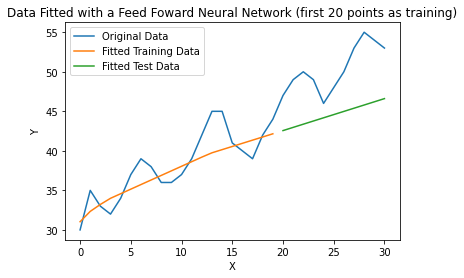

In [30]:
plt.figure() 
plt.plot(X, Y, label='Original Data')
plt.plot(X_train.detach().numpy(),y_pred_train.detach().numpy(), label='Fitted Training Data')
plt.plot(X_test.detach().numpy(),y_pred_test.detach().numpy(), label='Fitted Test Data')
plt.title('Data Fitted with a Feed Foward Neural Network (first 20 points as training)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [31]:
X_train, Y_train = torch.cat((X[:10], X[20:])), torch.cat((Y[:10], Y[20:]))
X_test, Y_test = X[10:20], Y[10:20]

# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, Y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}]')

# Compute the least-square error for the training set
y_pred_train = model(X_train)
train_error = ((Y_train - y_pred_train)**2).mean()

# Compute the least-square error for the test set
y_pred_test = model(X_test)
test_error = ((Y_test - y_pred_test)**2).mean()

print(f'Training error: {train_error:.4f}')
print(f'Test error: {test_error:.4f}')

Epoch [100/1000], Loss: 39.9750]
Epoch [200/1000], Loss: 35.5013]
Epoch [300/1000], Loss: 8.6145]
Epoch [400/1000], Loss: 6.6856]
Epoch [500/1000], Loss: 19.5971]
Epoch [600/1000], Loss: 5.8023]
Epoch [700/1000], Loss: 5.9335]
Epoch [800/1000], Loss: 4.9170]
Epoch [900/1000], Loss: 6.0211]
Epoch [1000/1000], Loss: 4.9132]
Training error: 4.6542
Test error: 8.1303


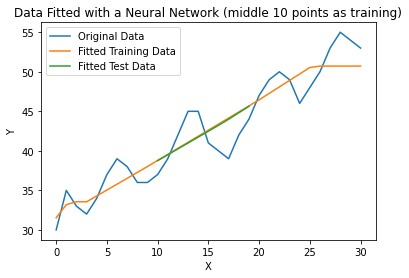

In [32]:
plt.figure() 
plt.plot(X, Y, label='Original Data')
plt.plot(X_train.detach().numpy(),y_pred_train.detach().numpy(), label='Fitted Training Data')
plt.plot(X_test.detach().numpy(),y_pred_test.detach().numpy(), label='Fitted Test Data')
plt.title('Data Fitted with a Neural Network (middle 10 points as training)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [38]:
# Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Compute the first 20 PCA modes of the training digit images
pca = PCA(n_components=20)
train_data = train_set.data.reshape(train_set.data.shape[0], -1).numpy()
test_data = test_set.data.reshape(test_set.data.shape[0], -1).numpy()
pca.fit(train_data)

# Transform train and test sets into PC space and normalize the input data
train_transform = pca.transform(train_data)
test_transform = pca.transform(test_data)

# Standardize the data to have mean 0 and standard deviation 1 (use statistics of the trainset)
mean = train_transform.mean(axis=0)
std = train_transform.std(axis=0)
train_transform = (train_transform - mean) / std
test_transform = (test_transform - mean) / std

# Convert to tensor 
train_transform = torch.tensor(train_transform, dtype=torch.float32)
test_transform = torch.tensor(test_transform, dtype=torch.float32)

In [39]:
# Convert to dataset
train_set2 = torch.utils.data.TensorDataset(train_transform, train_set.targets)
test_set2 = torch.utils.data.TensorDataset(test_transform, test_set.targets)

# Convert to iterable data for loading into models
train_loader = torch.utils.data.DataLoader(train_set2, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set2, batch_size=32, shuffle=False)

# Build a feed-forward neural network to classify the digits
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(20, 50) # Input 20 features from PCA
        self.fc2 = torch.nn.Linear(50,128)
        self.fc3 = torch.nn.Linear(128, 10) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train the NN on the training set and evaluate its performance on the testing set
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 1000 == 999:
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 1000:.3f}")
            running_loss = 0.0

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct / total * 100:.2f}%")

[1, 1000] loss: 1.835
[2, 1000] loss: 0.444
[3, 1000] loss: 0.347
[4, 1000] loss: 0.310
[5, 1000] loss: 0.273
[6, 1000] loss: 0.245
[7, 1000] loss: 0.228
[8, 1000] loss: 0.215
[9, 1000] loss: 0.198
[10, 1000] loss: 0.187
Accuracy: 94.75%


In [41]:
#Convert to dataset
train_set2 = torch.utils.data.TensorDataset(train_transform.unsqueeze(1), train_set.targets)
test_set2 = torch.utils.data.TensorDataset(test_transform.unsqueeze(1), test_set.targets)

#Convert to iterable data for loading into models
train_loader = torch.utils.data.DataLoader(train_set2, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set2, batch_size=32, shuffle=False)

# Build an LSTM network to classify the digits
class LSTM(torch.nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = torch.nn.LSTM(20, 50)
        self.fc = torch.nn.Linear(50, 10)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out

lstm = LSTM()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lstm.parameters(), lr=0.01)

# Train the LSTM network on the training set and evaluate its performance on the testing set
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = lstm(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 1000 == 999:
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 1000:.3f}")
            running_loss = 0.0

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = lstm(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct / total * 100:.2f}%")

[1, 1000] loss: 2.250
[2, 1000] loss: 1.823
[3, 1000] loss: 1.168
[4, 1000] loss: 0.758
[5, 1000] loss: 0.577
[6, 1000] loss: 0.482
[7, 1000] loss: 0.446
[8, 1000] loss: 0.421
[9, 1000] loss: 0.395
[10, 1000] loss: 0.378
Accuracy: 89.87%


In [42]:
#Train the SVM
clf = SVC(gamma='auto')
clf.fit(train_transform,train_set.targets)

#Test the SVM 
test_pred = clf.predict(test_transform)
labels = test_set.targets

correct = 0
for i in np.arange(len(test_pred)): 
    if test_pred[i] == labels[i]: 
        correct+=1
print(f"Accuracy: {correct / len(test_pred) * 100:.2f}%")

Accuracy: 97.75%


In [43]:
#Train the decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_transform,train_set.targets)

#Test the decision tree
test_pred = clf.predict(test_transform)
labels = test_set.targets

correct = 0
for i in np.arange(len(test_pred)): 
    if test_pred[i] == labels[i]: 
        correct+=1
print(f"Accuracy: {correct / len(test_pred) * 100:.2f}%")

Accuracy: 84.47%
